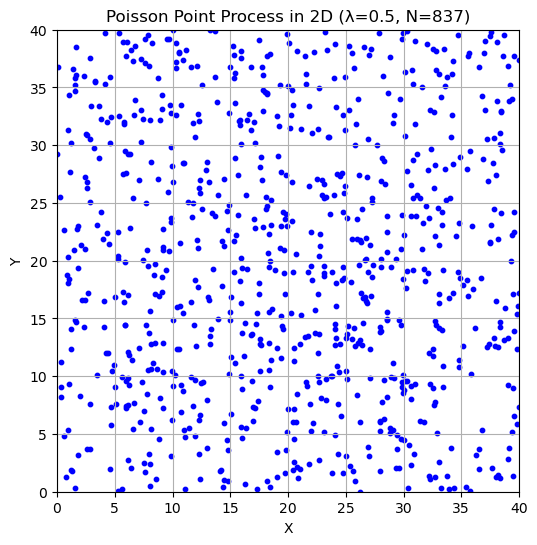

In [19]:
import importlib
import poisson_independent_points
importlib.reload(poisson_independent_points)
from poisson_independent_points import PoissonPointProcess2D

width = 40
generator = PoissonPointProcess2D(0.5, (width, width))
generator.generate_points()
generator.plot_points()
point_positions = generator.get_points()

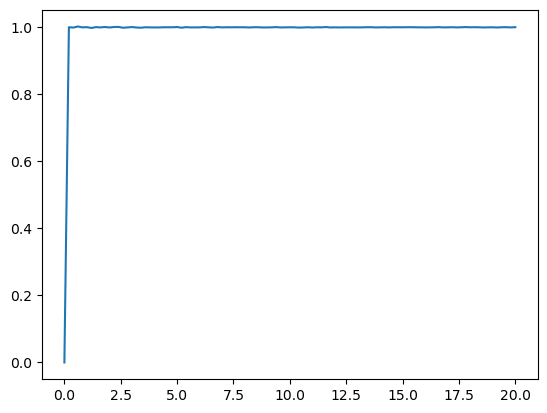

In [20]:
import calc
importlib.reload(calc)
import matplotlib.pyplot as plt
from calc import Hyperuniform_helper
import numpy as np

all_gr = []
for _ in range(1000000):
    generator = PoissonPointProcess2D(0.5, (width, width))
    generator.generate_points()
    point_positions = generator.get_points()
    helper = Hyperuniform_helper(width/2, (width/2, width/2), point_positions, generator.intensity)
    r, gr = helper.calculate_radial_distribution(100, 2)
    all_gr.append(gr)

avg_gr = np.mean(all_gr, axis=0)
plt.plot(r, avg_gr)

[ 0.31415927  0.31733259  0.32057068  0.32387553  0.32724923  0.33069396
  0.33421198  0.33780566  0.34147746  0.34522996  0.34906585  0.35298794
  0.35699917  0.3611026   0.36530147  0.36959914  0.37399913  0.37850514
  0.38312106  0.38785094  0.39269908  0.39766996  0.40276829  0.40799905
  0.41336745  0.41887902  0.42453955  0.43035516  0.43633231  0.44247784
  0.44879895  0.45530328  0.46199892  0.46889443  0.47599889  0.48332195
  0.49087385  0.4986655   0.50670849  0.51501519  0.52359878  0.53247333
  0.54165391  0.55115661  0.56099869  0.57119866  0.58177642  0.59275333
  0.60415243  0.61599856  0.62831853  0.64114136  0.65449847  0.66842397
  0.68295492  0.6981317   0.71399833  0.73060294  0.74799825  0.76624211
  0.78539816  0.80553658  0.82673491  0.8490791   0.87266463  0.8975979
  0.92399784  0.95199777  0.9817477   1.01341699  1.04719755  1.08330781
  1.12199738  1.16355283  1.20830487  1.25663706  1.30899694  1.36590985
  1.42799666  1.4959965   1.57079633  1.65346982  1.

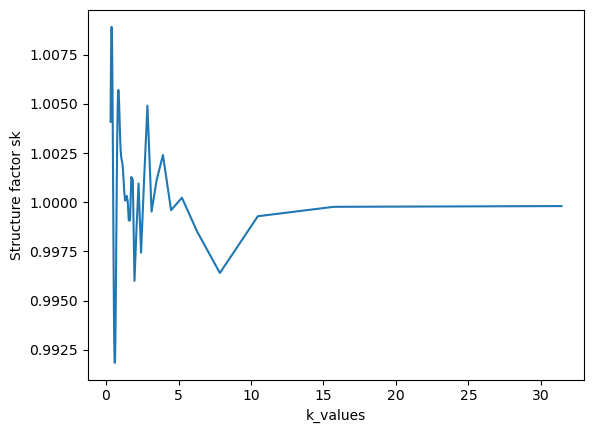

In [21]:
k_values = np.sort(2*np.pi/r[1:])
sk = helper.hankel_transform_2d(avg_gr[1:], r[1:], k_values)
plt.plot(k_values, sk)
plt.xlabel("k_values")
plt.ylabel("Structure factor sk")
print(k_values, sk)

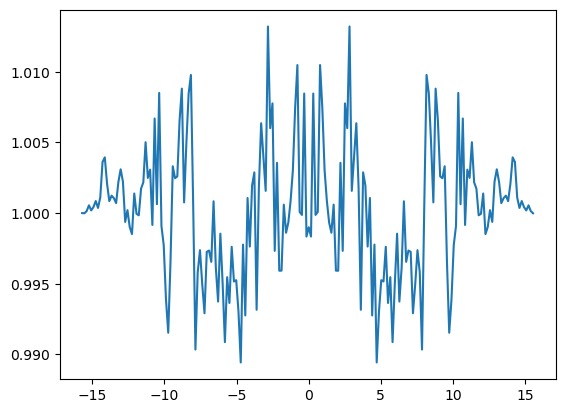

In [24]:
helper = Hyperuniform_helper(width/2, (width/2, width/2), point_positions, generator.intensity)
sk = helper.Fourier_transform_2d(avg_gr[1:])
r_neg = -r[1:][::-1]         # Negative radial coordinates
r_full = np.concatenate((r_neg, r[1:]))
N = len(r_full)
k_values = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=(r[1] - r[0])))
plt.plot(k_values, sk)
